## A principal tarefa da análise de dados é o estudo da variação


<br>
<br>

A tarefa principal da análise de dados e da estatística é analisar a variação dos dados: como diferentes indivíduos, produtos, preços, acontecimentos têm características diferentes ou como a mesma coisa muda ao longo do tempo. As pessoas têm rendas e gostos diferentes. O preço do café alguns dias sobe, em outros desce. Empresas que eram lucrativas vão à falência. Pessoas saudáveis se tornam doentes.

Há dois tipos principais de análise de dados ou de estatística: descrição e inferência. A primeira descreve a variação passada ou atual, para resumir ou explorar o que já conhecido. A estatística inferencial tenta prever a variação futura ou de casos desconhecidos.

A variação também é importante porque é uma medida do risco: risco de morte, risco de perda, risco de falência, a chance de conseguir um bom emprego, a chance de conseguir aumentar as vendas, a chance de viver até os 100 anos etc.

O desvio padrão é a principal medida de variação de uma variável. E a correlação é a principal medida de quanto a variação de uma variável está associada à variação de outra variável.

Este notebook é uma apresentação simples dessas medidas.

O primeiro passo é carregar os pacotes.
<br>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

O segundo passo é criar nosso conjunto de dados. Ele terá apenas seis observações e duas variáveis: cada linha é uma pessoa e as colunas informam os anos de estudo e a renda mensal delas.  

In [39]:
estudo = [8, 8, 10, 11, 11, 14] # cria uma lista 
salario = [1000, 1000, 1100, 1100, 1300, 2000] # cria outra lista

dados = pd.DataFrame({'estudo':estudo, 'salario':salario}) # transforma as listas em um dataframe
dados

,estudo,salario
0,8,1000
1,8,1000
2,10,1100
3,11,1100
4,11,1300
5,14,2000


Agora, já podemos fazer um diagrama de dispersão para observar a relação entre o estudo e a renda.

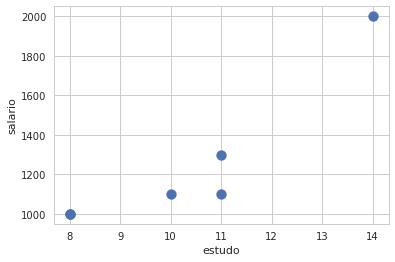

In [40]:
dados.plot.scatter('estudo', 'salario', s=100);

Para calcular a média dos salários basta usar o método `.mean()`:

In [41]:
dados.salario.mean()

1250.0

Dado que a média é apenas:

$$
\bar x = \frac{\displaystyle\sum_{i=1}^n{x_i}}{n}
$$

Poderíamos calculá-la assim: 

In [42]:
dados.salario.sum() / len(dados.salario)

1250.0

<br>

### Exercício


Calcule a média dos **anos de estudo** usando as duas maneiras mostradas acima.

In [44]:
# digite a primeira maneira aqui
dados.estudo.mean()

10.333333333333334

In [75]:
# digite a segunda maneira aqui
dados.estudo.sum() / len(dados.estudo)

10.333333333333334

### Analisando a variação

Há duas maneiras de analisar a variação: grafica ou numericamente.

O histograma é o principal tipo de gráfico para avaliar a dispersão dos dados.

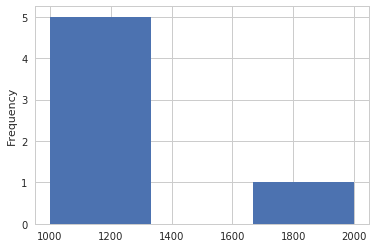

In [50]:
dados.salario.plot.hist(3);

Como temos apenas seis observações, o histograma ficou um pouco estranho.
Uma alternativa é um gráfico de densidade, uma versão suavizada do histograma.

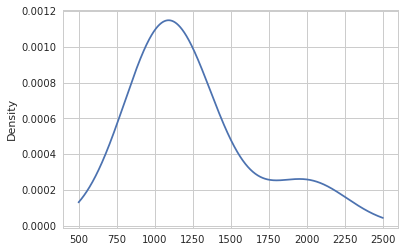

In [46]:
dados.salario.plot.kde();

<br>

### Exercício


Faça o histograma e o gráfico de dispersão para os **anos de estudo**.

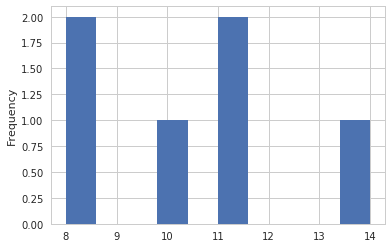

In [72]:
# digite o comando para o histograma aqui.
dados.estudo.plot.hist();

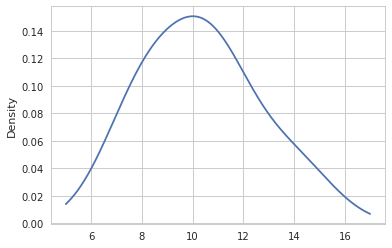

In [74]:
# digite o comando para o gráfico de dispersão aqui.
dados.estudo.plot.kde();

<br>
<br>

Para avaliar a dispersão numericamente é importante entender a ideia de *desvio médio*: 

> a média da distância de cada um dos dados em relação à média.

O primeiro passo, portanto, é:

In [51]:
dados.salario - dados.salario.mean()

0   -250.0
1   -250.0
2   -150.0
3   -150.0
4     50.0
5    750.0
Name: salario, dtype: float64

Porém, a média desse resultado é zero:

In [52]:
(dados.salario - dados.salario.mean()).mean()

0.0

A solução é calcular o módulo de cada uma das diferenças antes de fazer o somatório, a *diferença absoluta média* (*mean absolute difference*): 

$$
MAD = \frac{\displaystyle\sum_{i=1}^n \lvert x_i - \bar x \rvert}{n}
$$

Para calculá-la basta acrescentar o método `.abs()` a nosso comando.

In [55]:
(dados.salario - dados.salario.mean()).abs().mean()

266.6666666666667

Na prática, usamos a função já pronta:

In [71]:
dados.salario.mad()

266.6666666666667

Contudo, a MAD não é a medida de dispersão mais usada. A variância e o desvio padrão são muito mais comuns.  
Ao invés de calcularem o módulo, eles elevam os valores ao quadrado, são medidas baseadas no *quadrado da diferença*.

Para calculá-los, basta usar os seguintes comandos:

In [62]:
dados.salario.var()

147000.0

In [63]:
dados.salario.std()

383.40579025361626

O desvio padrão é simplesmente a raiz quadrada da variância:

In [ ]:
np.sqrt(dados.salario.var())

A vantagem do desvio padrão em relação à variância é o fato de ele estar na escala dos dados.

Como você pode observar, o desvio padrão foi maior do que a MAD. Isso acontece porque, por elevar ao quadrado, ele dá maior peso aos valores mais distantes da média. Além, seu denominador é $n - 1$, não $n$. Todas essas diferenças derivam de questões mais profundas de teoria estatística, relacionadas ao Teorema do Limite Central, à curva normal e ao processo de amostragem.

Aqui estão as fórmulas da variância ($S^2$) e do desvio padrão ($S$): 

$$
S^2 = \frac{\displaystyle \sum_{i=1}^n (x_i - \bar x)^2}{n-1}
$$

$$
S = \sqrt \frac{\displaystyle \sum_{i=1}^n (x_i - \bar x)^2}{n-1}
$$

<br>
<br>

### Exercício avançado (opcional)

Calcule a variância e o desvio padrão dos salário manualmente (isto é, usando apenas as funções básicas do python: multiplicação, divisão, raiz quadrada etc.), como fizemos acima com a média e o MAD.

<br>

In [67]:
# cálculo manual da variância
((dados.salario - dados.salario.mean()) ** 2).sum() / (len(dados.salario) - 1)

147000.0

In [68]:
# cálculo manual do desvio padrão
v = ((dados.salario - dados.salario.mean()) ** 2).sum() / (len(dados.salario) - 1)
v ** 0.5

383.40579025361626

## Calculando a correlação

A correlação é a principal medida de variação conjunta de duas variáveis.  

Basta digitar o seguinte:

In [69]:
dados.estudo.corr(dados.salario)

0.903805060585677

Para calcular a correlação entre todas as variáveis de um dataframe:

In [70]:
dados.corr()

,estudo,salario
estudo,1.000000,0.903805
salario,0.903805,1.000000


A correlação é a versão normalizada da covariância, usando o desvio padrão de cada uma das variáveis. Ela pode ser calculada assim:

In [ ]:
dados.estudo.cov(dados.salario)

Aqui estão as fórmulas da covariância, $cov()$, e da correlação, $r$:

$$
cov(x, y) = \frac{\displaystyle \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{n - 1}
$$

<br>
<br>

$$
r = \frac{cov(x, y)}{S_x S_y}
$$

Desdobrando os termos em seus significados, a fórmula da correlação é:

$$
r = \frac{\displaystyle \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{\sqrt{\displaystyle \sum_{i=1}^n (x_i - \bar x)^2} \sqrt{\displaystyle \sum_{i=1}^n (y_i - \bar y)^2}}
$$

**Observação profunda**: durante o cálculo da correlação o desvio em relação à média é calculado quatro vezes (duas no numerador e duas no denominador). 

<br>
<br>

### Exercício avançado (opcional)

Calcule a correlação manualmente.

<br>
<br>
<br>
<br>
